In [1]:
import fsps
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.interpolate import interp1d
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [2]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]

In [3]:
sp = fsps.StellarPopulation(imf_type=0,tpagb_norm_type=0,zcontinuous=1,
                            logzsol=np.log10(0.019/0.019), sfh=1,tau=0.1)
wv,fl=np.array(sp.get_spectrum(tage=2.0,peraa=True))


(3000, 6000)

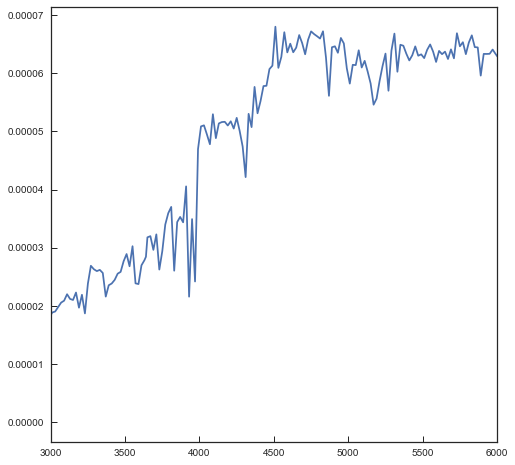

In [5]:
%matplotlib inline

plt.figure(figsize=[8,8])
plt.plot(wv,fl)
plt.xlim(3000,6000)